# Predicting Survival with Machine Learning

Introduction

Predicting outcomes based on historical data is one of the cornerstones of machine learning. By analyzing patterns within datasets, we can build models capable of estimating the likelihood of future events. This project focuses on building a predictive model that estimates whether an individual survives a hypothetical disaster scenario based on demographic and contextual information.

The objective is to demonstrate the power of logistic regression in binary classification tasks, transforming raw data into actionable insights.

In [1]:
#importing libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

C:\Users\PRECIOUS ONYEDEKE\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [51]:
df = pd.read_csv("train.csv")

Dataset Overview

The dataset used contains:

891 rows and 12 columns

Features include: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, etc.

The target variable: Survived (1 = Survived, 0 = Did Not Survive)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis (EDA)

Before diving into modeling, exploratory data analysis was conducted to uncover key patterns:

Gender: Females had a higher survival rate than males.

Class: First-class individuals were more likely to survive compared to those in lower classes.

Embarkation: Passengers embarking from specific ports had higher survival rates.

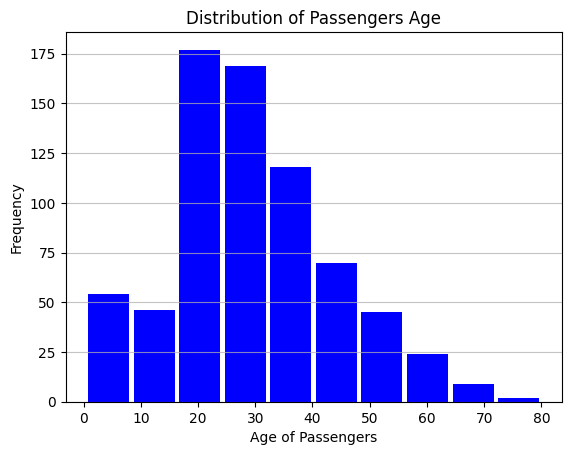

In [34]:
plt.hist(df['Age'], bins=10, rwidth=0.9, color="blue")

# Add x-axis label
plt.xlabel("Age of Passengers")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Passengers Age")

plt.grid(axis="y", alpha=0.75);

Histogram chart shows the age distribution in the dataset

# Data Preprocessing

Before proceeding to modeling, we considered the following about the columns in the dataset:

Columns with 50% null values – Columns exceeding this threshold were dropped to avoid introducing bias.

Columns with low or high cardinality – High cardinality columns (many unique values) and low cardinality (few unique values) were examined to prevent overfitting and underfitting.

Columns that can easily predict the target column – Features highly correlated with the target (potentially leading to data leakage) were carefully handled or removed.

Checking for columns with high correlation with the target – Features showing strong correlation were prioritized, while redundant ones were dropped.

Handling Missing Values:

The Age column had missing values. These were filled using the median age.

Missing values in the Embarked column were filled with the most common category.



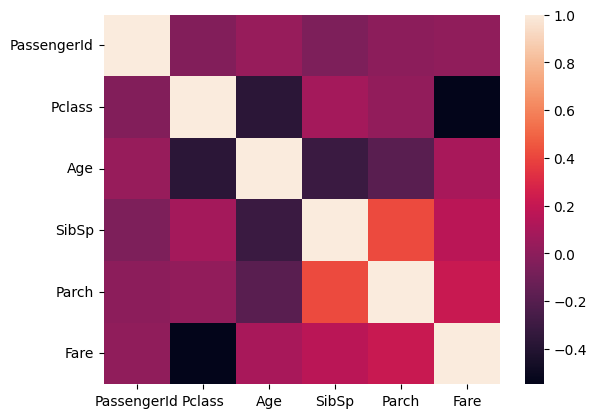

In [52]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="Survived").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation);


A heatmap was used to visualize correlations between features, revealing relationships that informed feature selection.


In [53]:
print(df["Survived"].corr(df["SibSp"]))
print(df["Survived"].corr(df["Parch"]))

-0.03532249888573564
0.08162940708348371


Text(0.5, 1.0, 'Distribution of Fare Prices')

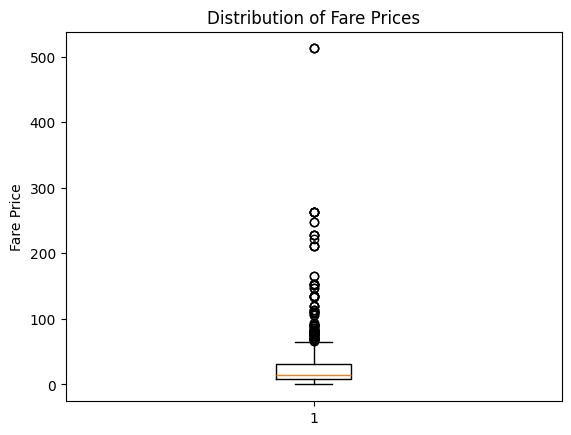

In [36]:
plt.boxplot(df["Fare"])

# Add x-label axis
plt.ylabel("Fare Price")

# Add y-label axis
plt.title("Distribution of Fare Prices")

In [37]:
# data cleaning function
def wrangle(df):
    df["Age"].fillna(df["Age"].median(),inplace=True)#Impute missing "Age"
    df["Age"]=df["Age"].astype(int) #converting age column to integer
    df = df[df["Fare"] < 500] #removing outliers (fare above 500)
    df = df.drop(columns=["Name", "Ticket", "Cabin", "SibSp","PassengerId"])#dropped features
    return df

In [38]:
df= wrangle(df)

In [39]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22,0,7.2500,S
1,1,1,female,38,0,71.2833,C
2,1,3,female,26,0,7.9250,S
3,1,1,female,35,0,53.1000,S
4,0,3,male,35,0,8.0500,S


# Modeling Approach

A logistic regression model was chosen for its effectiveness in binary classification tasks. The data was split into 80% training and 20% testing to evaluate the model’s performance.

Pipeline Implementation:

A pipeline was created to streamline preprocessing and model training:

In [40]:
target = "Survived"
y = df[target]
X = df.drop(columns=target)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (710, 6)
y_train shape: (710,)
X_test shape: (178, 6)
y_test shape: (178,)


In [42]:
accuracy_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(accuracy_baseline, 2))

Baseline Accuracy: 0.63


In [43]:
# Build model
model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', use_cat_names=True),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex', 'Embarked'],
                               handle_unknown='ignore', use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

# Encoding Categorical Features:

Sex and Embarked were transformed using OneHotEncoder.

The target variable Survived was encoded as 0 and 1.

In [44]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.79
Test Accuracy: 0.81


In [45]:
test=pd.read_csv("test.csv")

In [46]:

X_test=wrangle(test)
y_pred_test = model.predict(X_test)
X_test["Survived"]=y_pred_test


In [47]:
X_test

,Pclass,Sex,Age,Parch,Fare,Embarked,Survived
0,3,male,34,0,7.8292,Q,0
1,3,female,47,0,7.0000,S,0
2,2,male,62,0,9.6875,Q,0
3,3,male,27,0,8.6625,S,0
4,3,female,22,1,12.2875,S,1
...,...,...,...,...,...,...,...
413,3,male,27,0,8.0500,S,0
414,1,female,39,0,108.9000,C,1
415,3,male,38,0,7.2500,S,0
416,3,male,27,0,8.0500,S,0


# Interpreting Coefficients

In [54]:
features = model.named_steps["onehotencoder"].get_feature_names()
coefficient = model.named_steps["logisticregression"].coef_[0]

C:\Users\PRECIOUS ONYEDEKE\AppData\Roaming\Python\Python39\site-packages\category_encoders\utils.py:379: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [55]:
f_imp= pd.Series(np.exp(coefficient), index=features).sort_values()
f_imp

Sex_male        0.276004
Pclass          0.311725
Embarked_S      0.731295
Parch           0.842661
Embarked_Q      0.948925
Age             0.969236
Fare            0.999143
Embarked_C      1.171802
Embarked_nan    1.212875
Sex_female      3.573388
dtype: float64

Text(0.5, 0, 'Feature Importance')

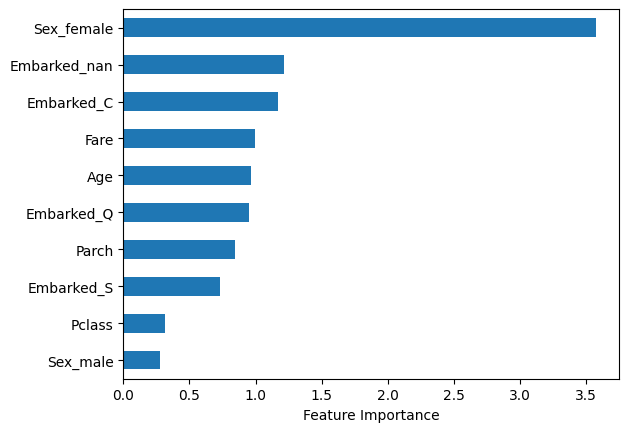

In [56]:
f_imp.plot(kind="barh")
plt.xlabel("Feature Importance")

Sex (female): The strongest predictor of survival. Women were more likely to survive.

Fare and Embarkation: Higher fares and embarking at specific ports correlated with increased survival rates.

Pclass: First-class individuals had better survival odds, but class alone was not as impactful as gender or fare.

# Conclusion

This project effectively demonstrates how machine learning, specifically logistic regression, can be used to predict survival outcomes based on historical data. The model achieved a solid 81% accuracy on the test set, surpassing the baseline accuracy of 63%. Key insights revealed that gender, class, and fare were among the strongest predictors of survival, with female passengers and higher fares being positively correlated with higher survival rates.
The results underscore the importance of exploratory data analysis (EDA) and feature selection in developing robust predictive models. By identifying and addressing data imbalances, encoding categorical variables, and eliminating irrelevant or redundant features, the model's performance improved significantly over the baseline.
